# Processing data

In [ ]:
from torch_geometric.data import HeteroData
import torch

In [ ]:
node_types=["song","artist","album"]
edge_types=[("song","by_artist","artist"),
            ("artist","sung","song"),
            ("song","in","album"),
            ("album","have","song"),
            ("artist","artist","album"),
            ("album","by_artist","artist")]

In [ ]:
import pandas as pd

In [ ]:
grapha_path="anaconda3/envs/gp/cg_mu_align/itunes_amazon/tableA.csv"
graphb_path="anaconda3/envs/gp/cg_mu_align/itunes_amazon/tableB.csv"
pair_train="anaconda3/envs/gp/cg_mu_align/itunes_amazon/train.csv"
pair_test="anaconda3/envs/gp/cg_mu_align/itunes_amazon/test.csv"
pair_valid="anaconda3/envs/gp/cg_mu_align/itunes_amazon/valid.csv"

In [ ]:
graph_a_data=pd.read_csv(grapha_path,header=0)
graph_a_data=graph_a_data.to_dict(orient='records')

In [ ]:
graph_b_data=pd.read_csv(graphb_path,header=0)
graph_b_data=graph_b_data.to_dict(orient='records')

In [ ]:
pair_data_dict={}

pair_train_data=pd.read_csv(pair_train,header=0)
pair_train_data=pair_train_data.to_dict(orient='records')
pair_data_dict['train']=pair_train_data

pair_test_data=pd.read_csv(pair_test,header=0)
pair_test_data=pair_test_data.to_dict(orient='records')
pair_data_dict['test']=pair_test_data

pair_valid_data=pd.read_csv(pair_valid,header=0)
pair_valid_data=pair_valid_data.to_dict(orient='records')
pair_data_dict['valid']=pair_valid_data

#{'ltable_id': 2725, 'rtable_id': 17169, 'label': 0}

In [ ]:
import copy

class Node:
    def __init__(this,temp_dict,idx):
        this.id=[temp_dict['id']]
        this.idx=idx
        this.temp_dict=copy.deepcopy(temp_dict)
        del this.temp_dict['id']
    def append_id(this,id):
        this.id.append(id)


def gen_graph(graph_data,node_types,edge_types,embd_model):

    graph=HeteroData()

    for node in node_types:
        graph[node].node_attr={}
        graph[node].node_index=0

    sn_dict={}
    ar_dict={}
    ab_dict={}

    id_map_lst={}

    edge_index_dict={}
    for edge in edge_types:
        edge_index_dict[edge]=[[],[]]

    node_attr_song={"name":[],"genre":[],"copy_right":[],"time":[],"released_date":[]}
    node_attr_ar={"name":[]}
    node_attr_ab={"name":[]}
    node_attr={"song":node_attr_song,"artist":node_attr_ar,"album":node_attr_ab}

    node_embedding_dict={}
    for node in node_types:
        node_embedding_dict[node]=[]

    for data_dict in graph_data:
        temp_dict=copy.deepcopy(data_dict)
        del temp_dict['id']
        #creating nodes
        exist=False
        temp=sn_dict.get(data_dict["Song_Name"],None)
        idx_song=None
        if(temp==None):
            #embedding
            song_attr_str=str(data_dict["Song_Name"]+data_dict["Genre"]+data_dict["CopyRight"]+data_dict["Time"]+str(data_dict["Released"]))
            if(song_attr_str!='nan'):
                node_embedding_dict["song"].append(list(embd_model.get_word_vector(song_attr_str)))

                idx_song=graph['song'].node_index
                graph['song'].node_index+=1
                temp_node=Node(data_dict,idx_song)
                sn_dict[data_dict["Song_Name"]]=temp_node
                node_attr["song"]["name"].append(data_dict["Song_Name"])
                node_attr["song"]["genre"].append(data_dict["Genre"])
                node_attr["song"]["copy_right"].append(data_dict["CopyRight"])
                node_attr["song"]["time"].append(data_dict["Time"])
                node_attr["song"]["released_date"].append(data_dict["Released"])

                id_map_dict=id_map_lst.get(data_dict['id'],{})
                id_map_dict['song']=idx_song
                id_map_lst[data_dict['id']]=id_map_dict
        else:
            idx_song=temp.idx
            temp.append_id(data_dict['id'])
            if(temp_dict==temp.temp_dict):
                exist=True
            song_attr_str='exist'

            id_map_dict=id_map_lst.get(data_dict['id'],{})
            id_map_dict['song']=idx_song
            id_map_lst[data_dict['id']]=id_map_dict


        temp=ar_dict.get(data_dict["Artist_Name"],None)
        idx_ar=None
        if(temp==None):
            #embedding
            ar_attr_str=str(data_dict["Artist_Name"])
            if(ar_attr_str!='nan'):
                node_embedding_dict["artist"].append(list(embd_model.get_word_vector(ar_attr_str)))
                idx_ar=graph['artist'].node_index
                graph['artist'].node_index+=1
                temp_node=Node(data_dict,idx_ar)
                ar_dict[data_dict["Artist_Name"]]=temp_node
                node_attr["artist"]["name"].append(data_dict["Artist_Name"])

                id_map_dict=id_map_lst.get(data_dict['id'],{})
                id_map_dict['artist']=idx_ar
                id_map_lst[data_dict['id']]=id_map_dict

        else:
            idx_ar=temp.idx
            temp.append_id(data_dict['id'])
            ar_attr_str='exist'

            id_map_dict=id_map_lst.get(data_dict['id'],{})
            id_map_dict['artist']=idx_ar
            id_map_lst[data_dict['id']]=id_map_dict

        temp=ab_dict.get(data_dict["Album_Name"],None)
        idx_ab=None
        if(temp==None):
            #embedding
            ab_attr_str=str(data_dict["Album_Name"])
            if(ab_attr_str!='nan'):
                node_embedding_dict["album"].append(list(embd_model.get_word_vector(ab_attr_str)))
                idx_ab=graph['album'].node_index
                graph['album'].node_index+=1
                temp_node=Node(data_dict,idx_ab)
                ab_dict[data_dict["Album_Name"]]=temp_node
                node_attr["album"]["name"].append(data_dict["Album_Name"])

                id_map_dict=id_map_lst.get(data_dict['id'],{})
                id_map_dict['album']=idx_ab
                id_map_lst[data_dict['id']]=id_map_dict
        else:
            idx_ab=temp.idx
            temp.append_id(data_dict['id'])
            ab_attr_str='exist'

            id_map_dict=id_map_lst.get(data_dict['id'],{})
            id_map_dict['album']=idx_ab
            id_map_lst[data_dict['id']]=id_map_dict

        '''
        edge_types=[("song","by_artist","artist"),
            ("artist","sung","song"),
            ("song","in","album"),
            ("album","have","song"),
            ("artist","artist","album"),
            ("album","by_artist","artist")]
        '''

        #creating edges
        if(exist==False):
            if(song_attr_str!='nan' and ar_attr_str!='nan'):
                edge=("song","by_artist","artist")
                edge_index_dict[edge][0].append(idx_song)
                edge_index_dict[edge][1].append(idx_ar)
                edge=("artist","sung","song")
                edge_index_dict[edge][0].append(idx_ar)
                edge_index_dict[edge][1].append(idx_song)
            if(song_attr_str!='nan' and ab_attr_str!='nan'):
                edge=("song","in","album")
                edge_index_dict[edge][0].append(idx_song)
                edge_index_dict[edge][1].append(idx_ab)
                edge=("album","have","song")
                edge_index_dict[edge][0].append(idx_ab)
                edge_index_dict[edge][1].append(idx_song)
            if(ar_attr_str!='nan' and ab_attr_str!='nan'):
                edge=("artist","artist","album")
                edge_index_dict[edge][0].append(idx_ar)
                edge_index_dict[edge][1].append(idx_ab)
                edge=("album","by_artist","artist")
                edge_index_dict[edge][0].append(idx_ab)
                edge_index_dict[edge][1].append(idx_ar)

    for edge in edge_types:
        graph[edge].edge_index=torch.tensor(edge_index_dict[edge])
    for node in node_types:
        graph[node].node_attr=node_attr[node]
        graph[node].x=torch.tensor(node_embedding_dict[node])

    return graph , id_map_lst


In [ ]:
import fasttext

# Load the pre-trained FastText model
model = fasttext.load_model('cc.en.300.bin')


In [ ]:
class Gph_Node:
    def __init__(this,node_type=None,node_index=None,neighbour_dict={},device='cpu'):
        this.node_type=node_type
        this.node_index=int(node_index)
        this.neighbour_dict={}
        this.neighbour_attn={}
        for edge , nbr in neighbour_dict.items():
            this.neighbour_dict[edge]=nbr
            this.neighbour_attn[edge]={}
            for idx in nbr :
                this.neighbour_attn[edge][idx]=torch.tensor(1.0,device=device)
    def reset_attn(this,device):
        this.neighbour_attn={}
        for edge , nbr in this.neighbour_dict.items():
            this.neighbour_attn[edge]={}
            for idx in nbr :
                this.neighbour_attn[edge][idx]=torch.tensor(1.0,device=device)
    def to(this,device):
        this.neighbour_attn={}
        for edge , attn_dict in this.neighbour_attn.items():
            for idx , attn in attn_dict.items():
                this.neighbour_attn[edge][idx]=attn.to(device)
class Gph_Hash:
    def __init__(this,edge_index_dict,data_meta_data,device):
        this.hash_map={}
        for node_type in data_meta_data[0]:
            this.hash_map[node_type]={}

        #updating neighbours
        for edge , edge_index in edge_index_dict.items():
            dest_node_type=edge[2]
            nbr_node_type=edge[0]
            for i in range(edge_index.shape[1]):
                dest_node_index=int(edge_index[1][i])
                dest_node=this.hash_map[dest_node_type].get(dest_node_index,None)
                if(dest_node==None):
                    dest_node=Gph_Node(dest_node_type,dest_node_index,device=device)
                    this.hash_map[dest_node_type][dest_node_index]=dest_node

                nbr_node_index=int(edge_index[0][i])
                nbr_node=this.hash_map[nbr_node_type].get(nbr_node_index,None)
                if(nbr_node==None):
                    nbr_node=Gph_Node(nbr_node_type,nbr_node_index,device=device)
                    this.hash_map[nbr_node_type][nbr_node_index]=nbr_node

                nbrs=dest_node.neighbour_dict.get(edge,None)
                if(nbrs==None):
                    nbrs=[]
                nbrs.append(nbr_node_index)
                dest_node.neighbour_dict[edge]=nbrs

        #resetting the attention
        for node_type , node_dict in this.hash_map.items():
            for node_idx , node in node_dict.items():
                node.reset_attn(device)
    def to(this,device):
        for node_type , node_dict in this.hash_map.items():
            for node_idx , node in node_dict.items():
                node.to(device)




In [ ]:
#{'ltable_id': 2725, 'rtable_id': 17169, 'label': 0}
def gen_graphs(graph_a_data,graph_b_data,node_types,edge_types,model,pair_data_dict,device,pair_count_limit=50):

    #generating graphs
    graph_a , id_map_a = gen_graph(graph_a_data,node_types,edge_types,model)
    graph_b , id_map_b = gen_graph(graph_b_data,node_types,edge_types,model)
    graph_a.to(device)
    graph_b.to(device)

    #computing graph hash
    graph_a['graph_hash']=Gph_Hash(graph_a.edge_index_dict,graph_a.metadata(),device)
    graph_b['graph_hash']=Gph_Hash(graph_b.edge_index_dict,graph_b.metadata(),device)

    #geneating positive pair dict
    pos_pair_data={'train':{},'test':{},'valid':{}}
    neg_pair_data_a={'train':{},'test':{},'valid':{}}
    neg_pair_data_b={'train':{},'test':{},'valid':{}}
    for pair_type in pos_pair_data.keys():
        for temp_dict in pair_data_dict[pair_type]:
            idx_dict1=id_map_a[temp_dict['ltable_id']]
            idx_dict2=id_map_b[temp_dict['rtable_id']]
            if(temp_dict['label']==1 ):
                for node1_type , idx1 in idx_dict1.items():
                    node1=(node1_type,idx1)
                    idx2=idx_dict2[node1_type]
                    pos_pair_data[pair_type][(node1_type,idx1)]=(node1_type,idx2)
            else:
                for node1_type , idx1 in idx_dict1.items():
                    neg_lst1=neg_pair_data_a[pair_type].get((node1_type,idx1),[])
                    for node2_type , idx2 in idx_dict2.items():
                        if((node2_type,idx2) not in neg_lst1):
                            neg_lst1.append((node2_type,idx2))
                        neg_lst2=neg_pair_data_b[pair_type].get((node2_type,idx2),[])
                        if((node1_type,idx1) not in neg_lst2):
                            neg_lst2.append((node1_type,idx1))
                        neg_pair_data_b[pair_type][(node2_type,idx2)]=neg_lst2
                    neg_pair_data_a[pair_type][(node1_type,idx1)]=neg_lst1

    #
    temp_pos_data={}
    #for pair_type in pos_pair_data.keys():
    pair_type='train'
    temp_lst=[]
    temp_dict={}
    count=0
    for node1_tuple , node2_tuple in pos_pair_data[pair_type].items():
        if(count<pair_count_limit):
            count+=1
            temp_dict[node1_tuple]=node2_tuple
        else:
            count=1
            temp_lst.append(temp_dict)
            temp_dict={node1_tuple:node2_tuple}
    if(len(temp_dict)>0):
        temp_lst.append(temp_dict)
    temp_pos_data[pair_type]=temp_lst
    temp_pos_data['test']=pos_pair_data['test']
    temp_pos_data['valid']=pos_pair_data['valid']


    #generating negetive pair dict
    neg_pair_data={'train':{},'test':{},'valid':{}}
    for pair_type in neg_pair_data.keys():
        for node1_tuple , node2_tuple in pos_pair_data[pair_type].items():
            node1_neg_lst=neg_pair_data_a[pair_type].get(node1_tuple,[])
            node2_neg_lst=neg_pair_data_b[pair_type].get(node2_tuple,[])
            temp_node_pair=(node1_tuple,node2_tuple)
            temp_neg_dict={}
            for node_tuple in node1_neg_lst:
                if(node_tuple!=node2_tuple):
                    temp_neg_dict[node1_tuple]=node_tuple
            for node_tuple in node2_neg_lst:
                if(node_tuple!=node1_tuple):
                    temp_neg_dict[node_tuple]=node2_tuple
            neg_pair_data[pair_type][temp_node_pair]=temp_neg_dict

    return graph_a ,graph_b , temp_pos_data , neg_pair_data


# Model

In [ ]:
import torch
from torch.nn import Linear, Parameter
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
from torch_geometric.data import Data , HeteroData
from torch.nn.parallel import DataParallel
from matplotlib import pyplot as plt

In [ ]:
class Gph_Node:
    def __init__(this,node_type=None,node_index=None,neighbour_dict={},device='cpu'):
        this.node_type=node_type
        this.node_index=int(node_index)
        this.neighbour_dict={}
        this.neighbour_attn={}
        for edge , nbr in neighbour_dict.items():
            this.neighbour_dict[edge]=nbr
            this.neighbour_attn[edge]={}
            for idx in nbr :
                this.neighbour_attn[edge][idx]=torch.tensor(1.0,device=device)
    def reset_attn(this,device):
        this.neighbour_attn={}
        for edge , nbr in this.neighbour_dict.items():
            this.neighbour_attn[edge]={}
            for idx in nbr :
                this.neighbour_attn[edge][idx]=torch.tensor(1.0,device=device)
    def to(this,device):
        this.neighbour_attn={}
        for edge , attn_dict in this.neighbour_attn.items():
            for idx , attn in attn_dict.items():
                this.neighbour_attn[edge][idx]=attn.to(device)
class Gph_Hash:
    def __init__(this,edge_index_dict,data_meta_data,device):
        this.hash_map={}
        for node_type in data_meta_data[0]:
            this.hash_map[node_type]={}

        #updating neighbours
        for edge , edge_index in edge_index_dict.items():
            dest_node_type=edge[2]
            nbr_node_type=edge[0]
            for i in range(edge_index.shape[1]):
                dest_node_index=int(edge_index[1][i])
                dest_node=this.hash_map[dest_node_type].get(dest_node_index,None)
                if(dest_node==None):
                    dest_node=Gph_Node(dest_node_type,dest_node_index,device=device)
                    this.hash_map[dest_node_type][dest_node_index]=dest_node

                nbr_node_index=int(edge_index[0][i])
                nbr_node=this.hash_map[nbr_node_type].get(nbr_node_index,None)
                if(nbr_node==None):
                    nbr_node=Gph_Node(nbr_node_type,nbr_node_index,device=device)
                    this.hash_map[nbr_node_type][nbr_node_index]=nbr_node

                nbrs=dest_node.neighbour_dict.get(edge,None)
                if(nbrs==None):
                    nbrs=[]
                nbrs.append(nbr_node_index)
                dest_node.neighbour_dict[edge]=nbrs

        #resetting the attention
        for node_type , node_dict in this.hash_map.items():
            for node_idx , node in node_dict.items():
                node.reset_attn(device)
    def to(this,device):
        for node_type , node_dict in this.hash_map.items():
            for node_idx , node in node_dict.items():
                node.to(device)




In [ ]:
#CGNN layer implimentation
class CGNNConv(MessagePassing):
    def __init__(self, in_channels, out_channels , data_meta_data):
        super().__init__(aggr='add')  # "Add" aggregation .

        self.node_list=data_meta_data[0]
        self.edge_list=data_meta_data[1]
        self.dest_node_list=[]
        for edge in self.edge_list:
            self.dest_node_list.append(edge[2])
        self.dest_node_list=list(set(self.dest_node_list))

        self.lin_self = Linear(in_channels,out_channels,bias=False)
        self.edges_lin=torch.nn.ModuleDict()
        for edge in self.edge_list:
            edge=str(edge)
            self.edges_lin[edge]=Linear(in_channels, out_channels, bias=False)
        self.activation=torch.nn.Sigmoid()

        self.reset_parameters()

    def reset_parameters(self):
        self.lin_self.reset_parameters()
        for lin in self.edges_lin.values(): ##
            lin.reset_parameters()

    def forward(self, x_dict, edge_index_dict,cross_graph_attention_dict=None , self_attention_dict=None):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]
        #cross_graph_attention_dict = {edge_type:'tensor_vector same as shape of edge index' , .....}
        #self_attention_dict = {edge_type:'tensor_vector same as shape of edge index' , .....}

        # Linearly transform node feature matrix.
        xn_dict={}
        for edge in self.edge_list:
            xn_dict[edge]=self.edges_lin[str(edge)](x_dict[edge[0]])
        xs_dict={}
        aggr_dict={}
        for node in self.dest_node_list:
            xs_dict[node]=self.lin_self(x_dict[node])

        #computing aggrigation
        for edge , edge_index  in edge_index_dict.items():
            xn=xn_dict[edge]
            xs=xs_dict[edge[2]]
            xs_shape=(int(xs.shape[0]),int(xs.shape[1]))
            # Compute normalization.
            norm=None
            row, col = edge_index
            if(cross_graph_attention_dict!=None and self_attention_dict!=None):
                norm=cross_graph_attention_dict[edge]*self_attention_dict[edge]
            else:
                norm=(degree(col,xs.shape[0],dtype=xs.dtype).pow(-1))[col]

            if(aggr_dict.get(edge[2],None)==None):
                aggr_dict[edge[2]] = self.propagate(edge_index,size=(xn.shape[0],xs.shape[0]), xn=xn, norm=norm )
            else:
                aggr_dict[edge[2]] += self.propagate(edge_index,size=(xn.shape[0],xs.shape[0]), xn=xn, norm=norm )
        #computing final output
        for node , xs in xs_dict.items():
            x_dict[node]=torch.cat((xs,aggr_dict[node]),dim=1)
            x_dict[node]=self.activation(x_dict[node])
        return x_dict , aggr_dict

    def message(self, xn_j, norm):
        # x_j has shape [E, out_channels]

        # Normalize node features.
        return norm.view(-1, 1) * xn_j

    def update(self,aggr_out):
        return aggr_out

In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
import time
#CGNN network
class CGNN_net(torch.nn.Module):
    def __init__(this,layers_lst,data_meta_data):
        super().__init__()

        this.num_layers=len(layers_lst)
        this.node_types=data_meta_data[0]
        this.edge_types=data_meta_data[1]
        this.cgnn_net1=torch.nn.ModuleList()
        #this.cgnn_net2=torch.nn.ModuleList()
        for lyr in layers_lst :
            this.cgnn_net1.append(CGNNConv(lyr[0],lyr[1],data_meta_data))
            #this.cgnn_net2.append(CGNNConv(lyr[0],lyr[1],data_meta_data))
        this.self_vect=torch.nn.ModuleDict()
        for edge in this.edge_types:
            #this.self_vect[str(edge)]=torch.nn.Parameter(torch.Tensor(layers_lst[-1][0]))
            this.self_vect[str(edge)]=torch.nn.Linear(layers_lst[-1][0],1,bias=False)

        this.leaky_relu=torch.nn.LeakyReLU()

    def forward(this, gph1, gph2, pair_dict):
        #gaph data
        x1_dict=gph1.x_dict
        edge_index1_dict=gph1.edge_index_dict
        graph_hash1=gph1.graph_hash

        x2_dict=gph2.x_dict
        edge_index2_dict=gph2.edge_index_dict
        graph_hash2=gph2.graph_hash

        #
        aggr1_dict={}
        aggr2_dict={}
        for index in range(this.num_layers-1):
            x1_dict , aggr1_dict = this.cgnn_net1[index](x1_dict,edge_index1_dict)
            x2_dict , aggr2_dict = this.cgnn_net1[index](x2_dict,edge_index2_dict)


        #computing self attention
        self_attention1_dict=this.self_attention(edge_index1_dict,aggr1_dict)
        self_attention2_dict=this.self_attention(edge_index2_dict,aggr2_dict)
        #computing cross attention
        cross_attention1_dict , cross_attention2_dict = this.cross_attention(aggr1_dict,edge_index1_dict,graph_hash1,aggr2_dict,edge_index2_dict,graph_hash2,pair_dict)

        x1_dict , aggr1_dict = this.cgnn_net1[-1](x1_dict,edge_index1_dict,cross_attention1_dict,self_attention1_dict)
        x2_dict , aggr2_dict = this.cgnn_net1[-1](x2_dict,edge_index2_dict,cross_attention2_dict,self_attention2_dict)

        return x1_dict , x2_dict
    def cross_attention(this,aggr1_dict,edge_index1_dict,graph_hash1,aggr2_dict,edge_index2_dict,graph_hash2,pair_dict):

        stt=time.time()

        device=next(this.self_vect[str(this.edge_types[0])].parameters()).device
        #computing cross attention
        count=0
        for node1_tuple , node2_tuple in pair_dict.items():
            count+=1
            #print("pair count:",count)
            #print("node1_tuple:",node1_tuple)
            #print("node2_tuple:",node2_tuple)
            node1_type=node1_tuple[0]
            node1_idx=node1_tuple[1]
            node2_type=node2_tuple[0]
            node2_idx=node2_tuple[1]

            node1=graph_hash1.hash_map[node1_type][node1_idx]
            node2=graph_hash2.hash_map[node2_type][node2_idx]
            #get neighbours
            node1_nbr_att={}
            for edge , nbrs in node1.neighbour_dict.items():
                node1_nbr_att[edge]={}
                for idx in nbrs:
                    node1_nbr_att[edge][idx]=torch.tensor(0.0,device=device)
            node2_nbr_att={}
            for edge , nbrs in node2.neighbour_dict.items():
                node2_nbr_att[edge]={}
                for idx in nbrs:
                    node2_nbr_att[edge][idx]=torch.tensor(0.0,device=device)

            #
            total_sum=0
            temp_time=time.time()
            for edge1 , nbrs1 in node1.neighbour_dict.items():
                #print("num nbrs node1:",len(nbrs1))
                for idx1, aggr1 in zip(nbrs1,aggr1_dict[edge1[0]][nbrs1]):
                    for edge2 , nbrs2 in node2.neighbour_dict.items():
                        #print("num nbrs node2:",len(nbrs2))
                        for idx2, aggr2 in zip(nbrs2,aggr2_dict[edge2[0]][nbrs2]):
                            temp=torch.exp(-torch.sqrt(((aggr1-aggr2)**2).sum()))
                            total_sum+=temp
                            #print("neighbour attn:",node1_nbr_att)
                            node1_nbr_att[edge1][idx1]+=temp
                            node2_nbr_att[edge2][idx2]+=temp
                            #print("temp",temp)
            #print("time taken for a pair:",time.time()-temp_time)


            for edge , nbrs_attn_dict in node1_nbr_att.items():
                for idx , attn in nbrs_attn_dict.items():
                    node1_nbr_att[edge][idx]=attn/total_sum
            for edge , nbrs_attn_dict in node2_nbr_att.items():
                for idx , attn in nbrs_attn_dict.items():
                    node2_nbr_att[edge][idx]=attn/total_sum

            node1.neighbour_attn=node1_nbr_att
            node2.neighbour_attn=node2_nbr_att

        cross_attention1_dict={}
        cross_attention2_dict={}
        for edge , edge_index in edge_index1_dict.items():
            temp=torch.tensor([],device=device)
            for i in range(edge_index.shape[1]):
                attn=graph_hash1.hash_map[edge[2]][int(edge_index[1][i])].neighbour_attn[edge][int(edge_index[0][i])]
                temp=torch.cat((temp,torch.tensor([attn],device=attn.device)))
                #temp.append(graph_hash1.hash_map[edge[2]][int(edge_index[1][i])].neighbour_attn[edge][int(edge_index[0][i])])
                graph_hash1.hash_map[edge[2]][int(edge_index[1][i])].neighbour_attn[edge][int(edge_index[0][i])]=torch.tensor(1.0,device=attn.device)

            cross_attention1_dict[edge]=temp

        for edge , edge_index in edge_index2_dict.items():
            temp=torch.tensor([],device=device)
            for i in range(edge_index.shape[1]):
                attn=graph_hash2.hash_map[edge[2]][int(edge_index[1][i])].neighbour_attn[edge][int(edge_index[0][i])]
                temp=torch.cat((temp,torch.tensor([attn],device=attn.device)))
                #temp.append(graph_hash2.hash_map[edge[2]][int(edge_index[1][i])].neighbour_attn[edge][int(edge_index[0][i])])
                graph_hash2.hash_map[edge[2]][int(edge_index[1][i])].neighbour_attn[edge][int(edge_index[0][i])]=torch.tensor(1.0,device=attn.device)
            cross_attention2_dict[edge]=temp

        #print("total time taken:",time.time()-stt)

        return cross_attention1_dict , cross_attention2_dict

    def self_attention(this,edge_index_dict,aggr_dict):
        output_dict={}
        norm_dict={}
        device='cpu'
        for edge , edge_index in edge_index_dict.items():
            edge_vect=this.self_vect[str(edge)]
            device=next(edge_vect.parameters()).device
            z_i=aggr_dict[edge[2]]
            z_j=aggr_dict.get(edge[0],None)
            if(z_j==None):
                z_j=torch.zeros(z_i.shape,device=device)
            z=torch.cat((z_i[edge_index[1]],z_j[edge_index[0]]),dim=1)
            output_dict[edge]=torch.exp(this.leaky_relu(edge_vect(z).t()[0]))
            temp_norm=norm_dict.get(edge[2],None)
            if(temp_norm==None):
                temp_norm=torch.zeros(z_i.shape[0],device=device)
            for idx , val in zip(edge_index[1],output_dict[edge]):
                temp_norm[idx]+=val
            norm_dict[edge[2]]=temp_norm
        #normalizing
        for edge , edge_index in edge_index_dict.items():
            output_dict[edge]=output_dict[edge]/(norm_dict[edge[2]][edge_index[1]])
        return output_dict


In [ ]:
graph_a , graph_b , pos_pair_dict , neg_pair_dict = gen_graphs(graph_a_data,graph_b_data,node_types,edge_types,model,pair_data_dict,device)

In [ ]:
del model

In [ ]:
model_layers=[(300,150),(300,150)]

In [ ]:
temp_model=CGNN_net(model_layers,graph_a.metadata()).to(device)

In [ ]:
optzr = torch.optim.Adam(temp_model.parameters(), lr=0.003, weight_decay=5e-4)

In [ ]:
#loss function
def marginal_hinge_loss(x1_dict,x2_dict,pair_dict,neg_pair_dict={},gamma=0):
    loss=0
    for node1_tuple , node2_tuple in pair_dict.items():
        pos_dist=torch.sqrt(((x1_dict[node1_tuple[0]][node1_tuple[1]]-x2_dict[node2_tuple[0]][node2_tuple[1]])**2).sum())
        for node3_tuple , node4_tuple in neg_pair_dict[(node1_tuple,node2_tuple)].items():
            neg_dist=torch.sqrt(((x1_dict[node3_tuple[0]][node3_tuple[1]]-x2_dict[node4_tuple[0]][node4_tuple[1]])**2).sum())
            l=pos_dist-neg_dist+gamma
            loss+=torch.max(torch.zeros_like(l),l)
    return loss

In [ ]:
import time
#training model
def train_model(model,optimizer,graph1,graph2,pair_lst,neg_pair_dict,num_epoch=100,save_path=None):
    model.train()
    print("training:\n\n")
    tst=time.time()
    for epch in range(num_epoch):
        print("________________________________")
        print("epoch:",epch)
        st=time.time()
        tloss=0
        lst_count=0
        for pair_dict in pair_lst:
            lst_count+=1
            #print("lst count:",lst_count)
            optimizer.zero_grad()
            embd1_dict , embd2_dict = model(graph1,graph2,pair_dict)
            loss=marginal_hinge_loss(embd1_dict,embd2_dict,pair_dict,neg_pair_dict)
            tloss+=loss
            loss.backward()
            optimizer.step()
        print("Loss:",float(tloss))
        et=time.time()
        print("time taken:",et-st,' s')
        print("________________________________\n\n")
        if(save_path!=None):
            torch.save(model.state_dict(),save_path)
    tet=time.time()
    print("Done")
    print("Total time taken:",tet-tst," s")



In [ ]:
save_path="model2_shared.pth"

In [ ]:
train_model(temp_model,optzr,graph_a,graph_b,pos_pair_dict['train'],neg_pair_dict['train'],10,save_path)

training:


________________
epoch: 0
Loss: 1.556697130203247
time taken: 615.1609644889832  s
________________


________________
epoch: 1
Loss: 0.18178939819335938
time taken: 576.2161679267883  s
________________


________________
epoch: 2
Loss: 0.30678045749664307
time taken: 586.8457968235016  s
________________


________________
epoch: 3
Loss: 0.3481397032737732
time taken: 623.0647089481354  s
________________


________________
epoch: 4
Loss: 0.3246917128562927
time taken: 568.9512984752655  s
________________


________________
epoch: 5
Loss: 0.2802274823188782
time taken: 701.2687861919403  s
________________


________________
epoch: 6
Loss: 0.2088443636894226
time taken: 707.5523989200592  s
________________


________________
epoch: 7
Loss: 0.12811413407325745
time taken: 702.9133903980255  s
________________


________________
epoch: 8
Loss: 0.04768034815788269
time taken: 699.1679785251617  s
________________


________________
epoch: 9
Loss: 0.0
time taken: 699.600003

In [ ]:
def test_model(model,graph1,graph2,pair_dict,test_pair_dict,th_step=0.1):
    model.eval()
    tst=time.time()
    tloss=0
    pair_count=0
    true_count=0
    false_count=0
    TP=0
    FP=0
    TN=0
    FN=0
    embd1_dict , embd2_dict = model(graph1,graph2,pair_dict)
    loss=marginal_hinge_loss(embd1_dict,embd2_dict,pair_dict,test_pair_dict)
    true_pair_mask=[]
    dist_scores=[]

    for true_pair , neg_dict in test_pair_dict.items():
        pair_count+=1
        node1_embd=embd1_dict[true_pair[0][0]][true_pair[0][1]]
        node2_embd=embd2_dict[true_pair[1][0]][true_pair[1][1]]
        pred=True
        true_dist_sq=torch.sqrt(((node1_embd-node2_embd)**2).sum())
        true_pair_mask.append(True)
        dist_scores.append(true_dist_sq)
        #print("dist:",true_dist_sq)
        true_dist_sig=torch.sigmoid(true_dist_sq)
        #print("dist_sig:",true_dist_sig)
        for node1_tuple , node2_tuple in neg_dict.items():
            embd1=embd1_dict[node1_tuple[0]][node1_tuple[1]]
            embd2=embd2_dict[node2_tuple[0]][node2_tuple[1]]
            dist_sq = torch.sqrt(((embd1-embd2)**2).sum())
            dist_sig=torch.sigmoid(dist_sq)

            true_pair_mask.append(False)
            dist_scores.append(dist_sq)

            if(dist_sq<true_dist_sq):
                pred=False
                break
        if(pred):
            true_count+=1

    '''
    print("accuracy:",true_count/pair_count)
    print("loss:",float(loss))
    '''

    true_pair_mask=torch.tensor(true_pair_mask)
    dist_scores=torch.tensor(dist_scores)
    #dist_scores=torch.softmax(dist_scores,dim=0)
    ##
    th_score_dict={}
    th_min=torch.min(dist_scores)
    th_max=torch.max(dist_scores)
    th=0
    while th<th_max :
        th+=th_step
        th_score_dict[th]={'TP':0,'FP':0,'TN':0,'FN':0}
    ##
    false_pair_mask= true_pair_mask==False
    prec_curv=[]
    recall_curv=[]
    FPR_curv=[]
    th=0
    while th<th_max :
        th+=th_step
        th_score_dict[th]['TP']=((dist_scores[true_pair_mask]<=th).sum()).item()
        th_score_dict[th]['FN']=((dist_scores[true_pair_mask]>th).sum()).item()
        th_score_dict[th]['TN']=((dist_scores[false_pair_mask]>th).sum()).item()
        th_score_dict[th]['FP']=((dist_scores[false_pair_mask]<=th).sum()).item()

        #print("________________")
        #print("for dist_th:",th)
        #print("True positive:",th_score_dict[th]['TP'])
        #print("False positive:",th_score_dict[th]['FP'])
        #print("True Negetive:",th_score_dict[th]['TN'])
        #print('False Negetive:',th_score_dict[th]['FN'])
        if((th_score_dict[th]['TP']+th_score_dict[th]['FN'])>0 and (th_score_dict[th]['TP']+th_score_dict[th]['FP'])>0):
            recall=th_score_dict[th]['TP']/(th_score_dict[th]['TP']+th_score_dict[th]['FN'])
            precision=th_score_dict[th]['TP']/(th_score_dict[th]['TP']+th_score_dict[th]['FP'])
            FPR=th_score_dict[th]['FP']/(th_score_dict[th]['FP']+th_score_dict[th]['TN'])
            recall_curv.append(recall)
            prec_curv.append(precision)
            FPR_curv.append(FPR)
            #print("recall:",recall)
            #print("precision:",precision)
            #print("FPR:",FPR)
        #print("________________\n\n")


    return true_count/pair_count , loss , recall_curv , prec_curv ,FPR_curv






In [ ]:
acc_test , loss_test , recall_curv_test , precision_curv_test , FPR_curv_test = test_model(temp_model,graph_a,graph_b,pos_pair_dict['test'],neg_pair_dict['test'],0.1)

In [ ]:
acc_valid , loss_valid , recall_curv_valid , precision_curv_valid , FPR_curv_valid = test_model(temp_model,graph_a,graph_b,pos_pair_dict['valid'],neg_pair_dict['valid'],0.1)

In [ ]:
print("______test data______")
print("accuracy:",acc_test)
print("loss:",loss_test)
print("\n\n")
print("______validation data______")
print("accuracy:",acc_valid)
print("loss:",loss_valid)
print("\n\n")

______test data______
accuracy: 0.9861111111111112
loss: tensor(0.1858, device='cuda:0', grad_fn=<AddBackward0>)



______validation data______
accuracy: 0.9558823529411765
loss: tensor(1.0357, device='cuda:0', grad_fn=<AddBackward0>)





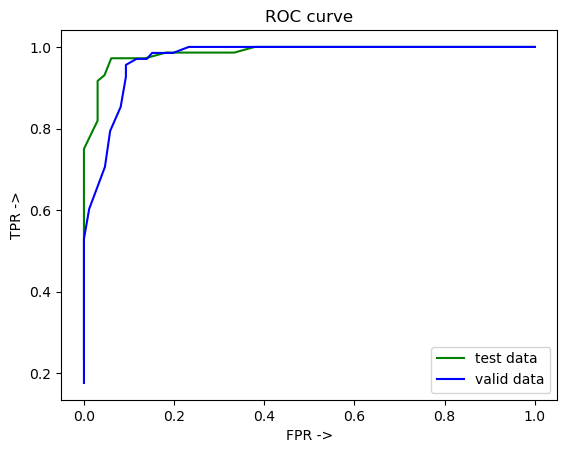

In [ ]:
plt.plot(FPR_curv_test,recall_curv_test,label='test data',color='green')
plt.plot(FPR_curv_valid,recall_curv_valid,label='valid data',color='blue')
plt.xlabel("FPR ->")
plt.ylabel("TPR ->")
plt.title("ROC curve")
plt.legend()
plt.show()

In [ ]:
del temp_model

# Model with 3 GNN layers

In [ ]:
model_layers=[(300,150),(300,150),(300,150)]

In [ ]:
temp_model3=CGNN_net(model_layers,graph_a.metadata()).to(device)

In [ ]:
optzr = torch.optim.Adam(temp_model3.parameters(), lr=0.003, weight_decay=5e-4)

In [ ]:
save_path="anaconda3/envs/gp/cg_mu_align/model3_shared.pth"

In [ ]:
train_model(temp_model3,optzr,graph_a,graph_b,pos_pair_dict['train'],neg_pair_dict['train'],5,save_path)

training:


_______________________________
epoch: 0
Loss: 0.12892070412635803
time taken: 521.9801187515259  s
________________________________


_______________________________
epoch: 1
Loss: 0.08187594264745712
time taken: 530.6616766452789  s
________________________________


_______________________________
epoch: 2
Loss: 0.057277798652648926
time taken: 531.050196647644  s
________________________________


_______________________________
epoch: 3
Loss: 0.07084208726882935
time taken: 531.3476746082306  s
________________________________


_______________________________
epoch: 4
Loss: 0.0748702809214592
time taken: 532.5020458698273  s
________________________________


Done
Total time taken: 2648.0017886161804  s


In [ ]:
temp_model3.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [ ]:
acc_test , loss_test , recall_curv_test , precision_curv_test , FPR_curv_test = test_model(temp_model3,graph_a,graph_b,pos_pair_dict['test'],neg_pair_dict['test'],0.1)

In [ ]:
acc_valid , loss_valid , recall_curv_valid , precision_curv_valid , FPR_curv_valid = test_model(temp_model3,graph_a,graph_b,pos_pair_dict['valid'],neg_pair_dict['valid'],0.1)

In [ ]:
print("______test data______")
print("accuracy:",acc_test)
print("loss:",loss_test.item())
print("\n\n")
print("______validation data______")
print("accuracy:",acc_valid)
print("loss:",loss_valid.item())
print("\n\n")

______test data______
accuracy: 1.0
loss: 0.0



______validation data______
accuracy: 1.0
loss: 0.0





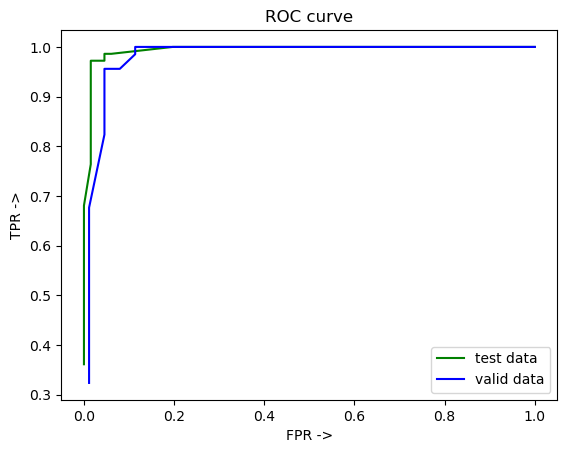

In [ ]:
plt.plot(FPR_curv_test,recall_curv_test,label='test data',color='green')
plt.plot(FPR_curv_valid,recall_curv_valid,label='valid data',color='blue')
plt.xlabel("FPR ->")
plt.ylabel("TPR ->")
plt.title("ROC curve")
plt.legend()
plt.show()

# Model with 4 GNN layers

In [ ]:
model_layers=[(300,150),(300,150),(300,150),(300,150)]

In [ ]:
temp_model4=CGNN_net(model_layers,graph_a.metadata()).to(device)

In [ ]:
optzr = torch.optim.Adam(temp_model4.parameters(), lr=0.003, weight_decay=5e-4)

In [ ]:
save_path="anaconda3/envs/gp/cg_mu_align/model4_shared.pth"

In [ ]:
train_model(temp_model4,optzr,graph_a,graph_b,pos_pair_dict['train'],neg_pair_dict['train'],20,save_path)

training:


________________________________
epoch: 0
Loss: 1.065077781677246
time taken: 604.5712175369263  s
________________________________


________________________________
epoch: 1
Loss: 0.3816908001899719
time taken: 553.6665635108948  s
________________________________


________________________________
epoch: 2
Loss: 0.3714655637741089
time taken: 553.5070693492889  s
________________________________


________________________________
epoch: 3
Loss: 0.33482876420021057
time taken: 551.7823388576508  s
________________________________


________________________________
epoch: 4
Loss: 0.311007022857666
time taken: 683.1609916687012  s
________________________________


________________________________
epoch: 5
Loss: 0.27128154039382935
time taken: 697.4735696315765  s
________________________________


________________________________
epoch: 6
Loss: 0.22335758805274963
time taken: 698.1283504962921  s
________________________________


________________________________
epoch: 7


In [ ]:
temp_model4.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [ ]:
acc_test , loss_test , recall_curv_test , precision_curv_test , FPR_curv_test = test_model(temp_model4,graph_a,graph_b,pos_pair_dict['test'],neg_pair_dict['test'],0.1)

In [ ]:
acc_valid , loss_valid , recall_curv_valid , precision_curv_valid , FPR_curv_valid = test_model(temp_model4,graph_a,graph_b,pos_pair_dict['valid'],neg_pair_dict['valid'],0.1)

In [ ]:
print("______test data______")
print("accuracy:",acc_test)
print("loss:",loss_test.item())
print("\n\n")
print("______validation data______")
print("accuracy:",acc_valid)
print("loss:",loss_valid.item())
print("\n\n")

______test data______
accuracy: 1.0
loss: 0.0



______validation data______
accuracy: 1.0
loss: 0.0





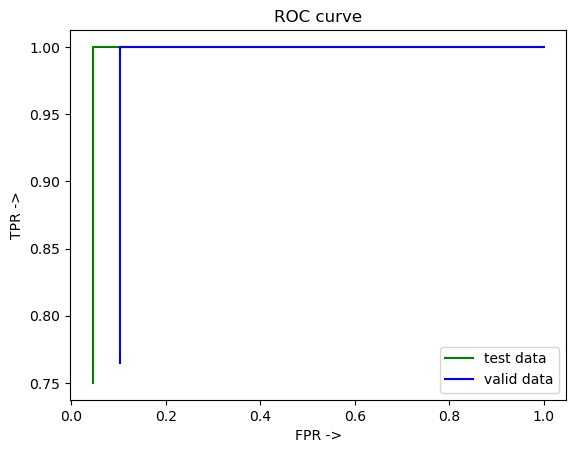

In [ ]:
plt.plot(FPR_curv_test,recall_curv_test,label='test data',color='green')
plt.plot(FPR_curv_valid,recall_curv_valid,label='valid data',color='blue')
plt.xlabel("FPR ->")
plt.ylabel("TPR ->")
plt.title("ROC curve")
plt.legend()
plt.show()